In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
%matplotlib notebook 
# For plotting. Don't include this if you submit
                     # a Jupyter Notebook to Gradescope.

# Solving systems of ODEs using `scipy.integrate.solve_ivp`

Most interesting examples are not modeling only one thing. For instance, before we were talking about modeling populations. Populations don't exist on their own: there is interaction. 

I will introduce "systems of ODEs" through an example. We will consider model of the population of rabbits and the population of foxes. They can interact. Such a model is called a *Lotka-Volterra predator-prey model.*

Let $x(t)$ be the population of rabbits and $y(t)$ be the population of foxes. A Lotka-Volterra predator-prey model is of the form

$\frac{dx}{dt} = ax -bxy$
 
$\frac{dy}{dt} = -cy+dxy$
 
where $a$, $b$, $c$, and $d$ are constants. Let's use $a = 4,~b = 2,~ c = 1,$ and $d = 2$. We can use as initial conditions $x(0) = 1$ and $y(0) = 1$. I am using small numbers to make things easier, but you can imagine these numbers as being in units of thousands or millions. We will solve from $t = 0$ to $t = 12$.

<IPython.core.display.Javascript object>


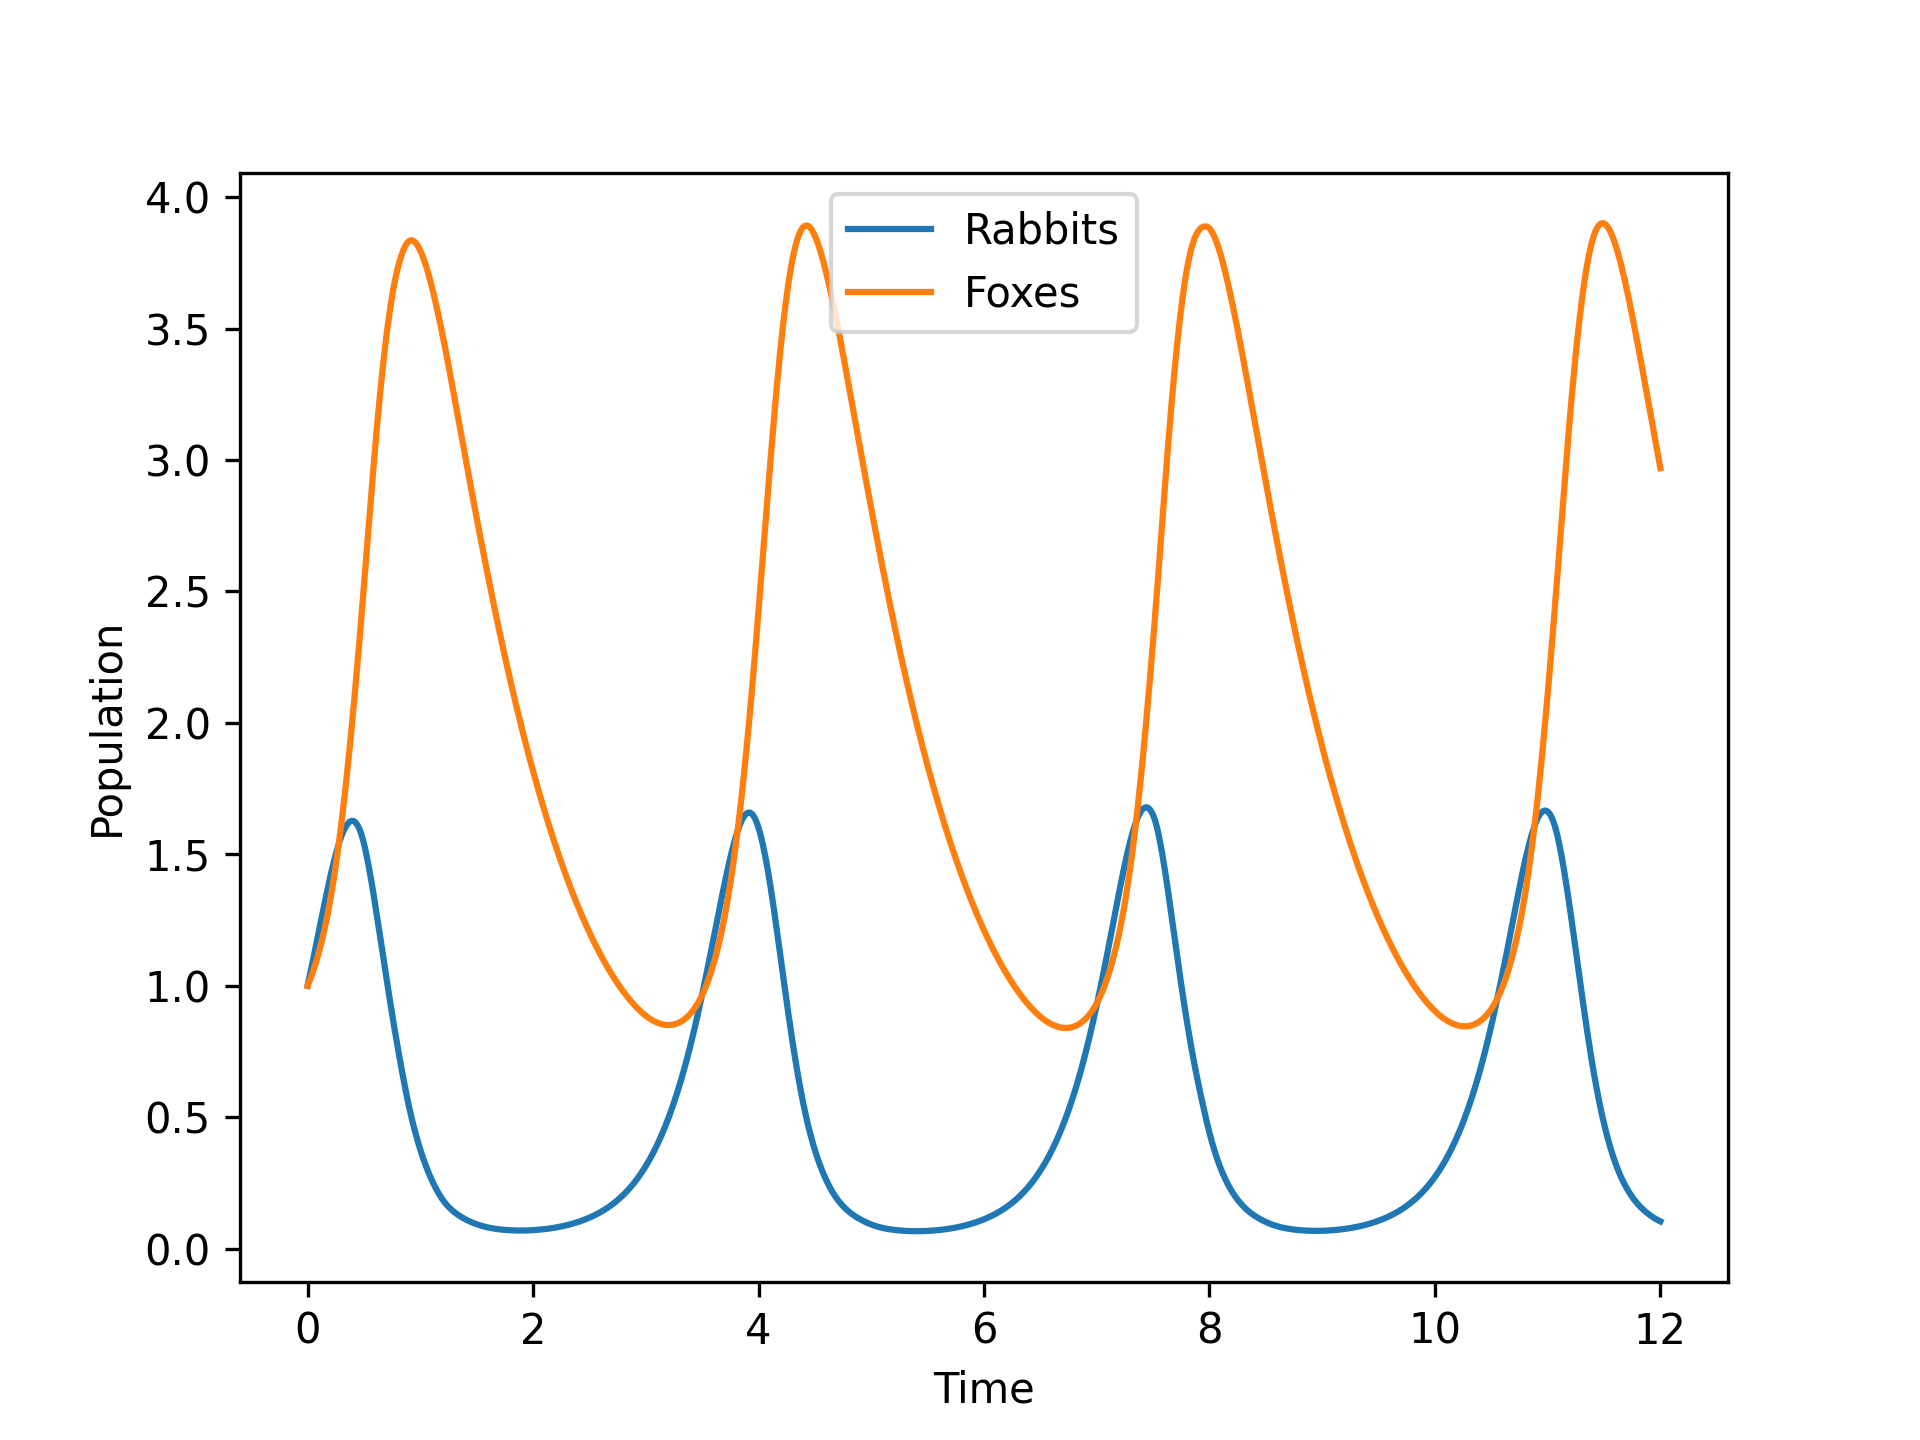

In [2]:
# First define the constants, a, b, c, d
a = 4
b = 2
c = 1
d = 2

# Then define the *two* ODEs. I've defined dxdt below, 
# you define dydt
dxdt = lambda x, y: a*x - b*x*y
dydt = lambda x, y: -c*y + d*x*y

# Now that those are defined, we need to write 
# an adapter-type function that combines the two ODEs.
# This will have two inputs: t and v = [x, y]. The vector v
# represents the vector containing the population of the two 
# species. The output should also be an array, saying how
# both species change
odefun = lambda t, v: np.array([dxdt(v[0],v[1]), dydt(v[0],v[1])])


# Now the initial condition isn't only one number. 
# We need to know the population of both species!
# The initial condition is an *array*
v0 = np.array([1, 1])

# Define 'tspan', which is the t values at which 
# we want the solution
tspan = np.linspace(0,12,1000)

# Then solve as before!
sol = scipy.integrate.solve_ivp(odefun, np.array([tspan[0], tspan[-1]]), v0, t_eval = tspan)
tsol = sol.t
vsol = sol.y

# Print out the solution, what do we have?
# Two arrays: one representing the population of the 
# rabbits for all times and one representing the foxes
# for all times. 
rabbits = vsol[0, :]
foxes = vsol[1, :]

# How do we plot it? We could plot both together:
fig2, ax2 = plt.subplots()
# This plots the rabbits
ax2.plot(tsol, rabbits, label='Rabbits')
# Now you plot the foxes
ax2.plot(tsol, foxes, label='Foxes')
ax2.set_xlabel('Time')
ax2.set_ylabel('Population')
ax2.legend()




Another (more common) way for us to visualize this is to plot the two species compared to one another. This makes sense because the populations obviously depend on one another! It also makes it easier to analyze the results. Such a plot is called a *phase portrait.*

<IPython.core.display.Javascript object>


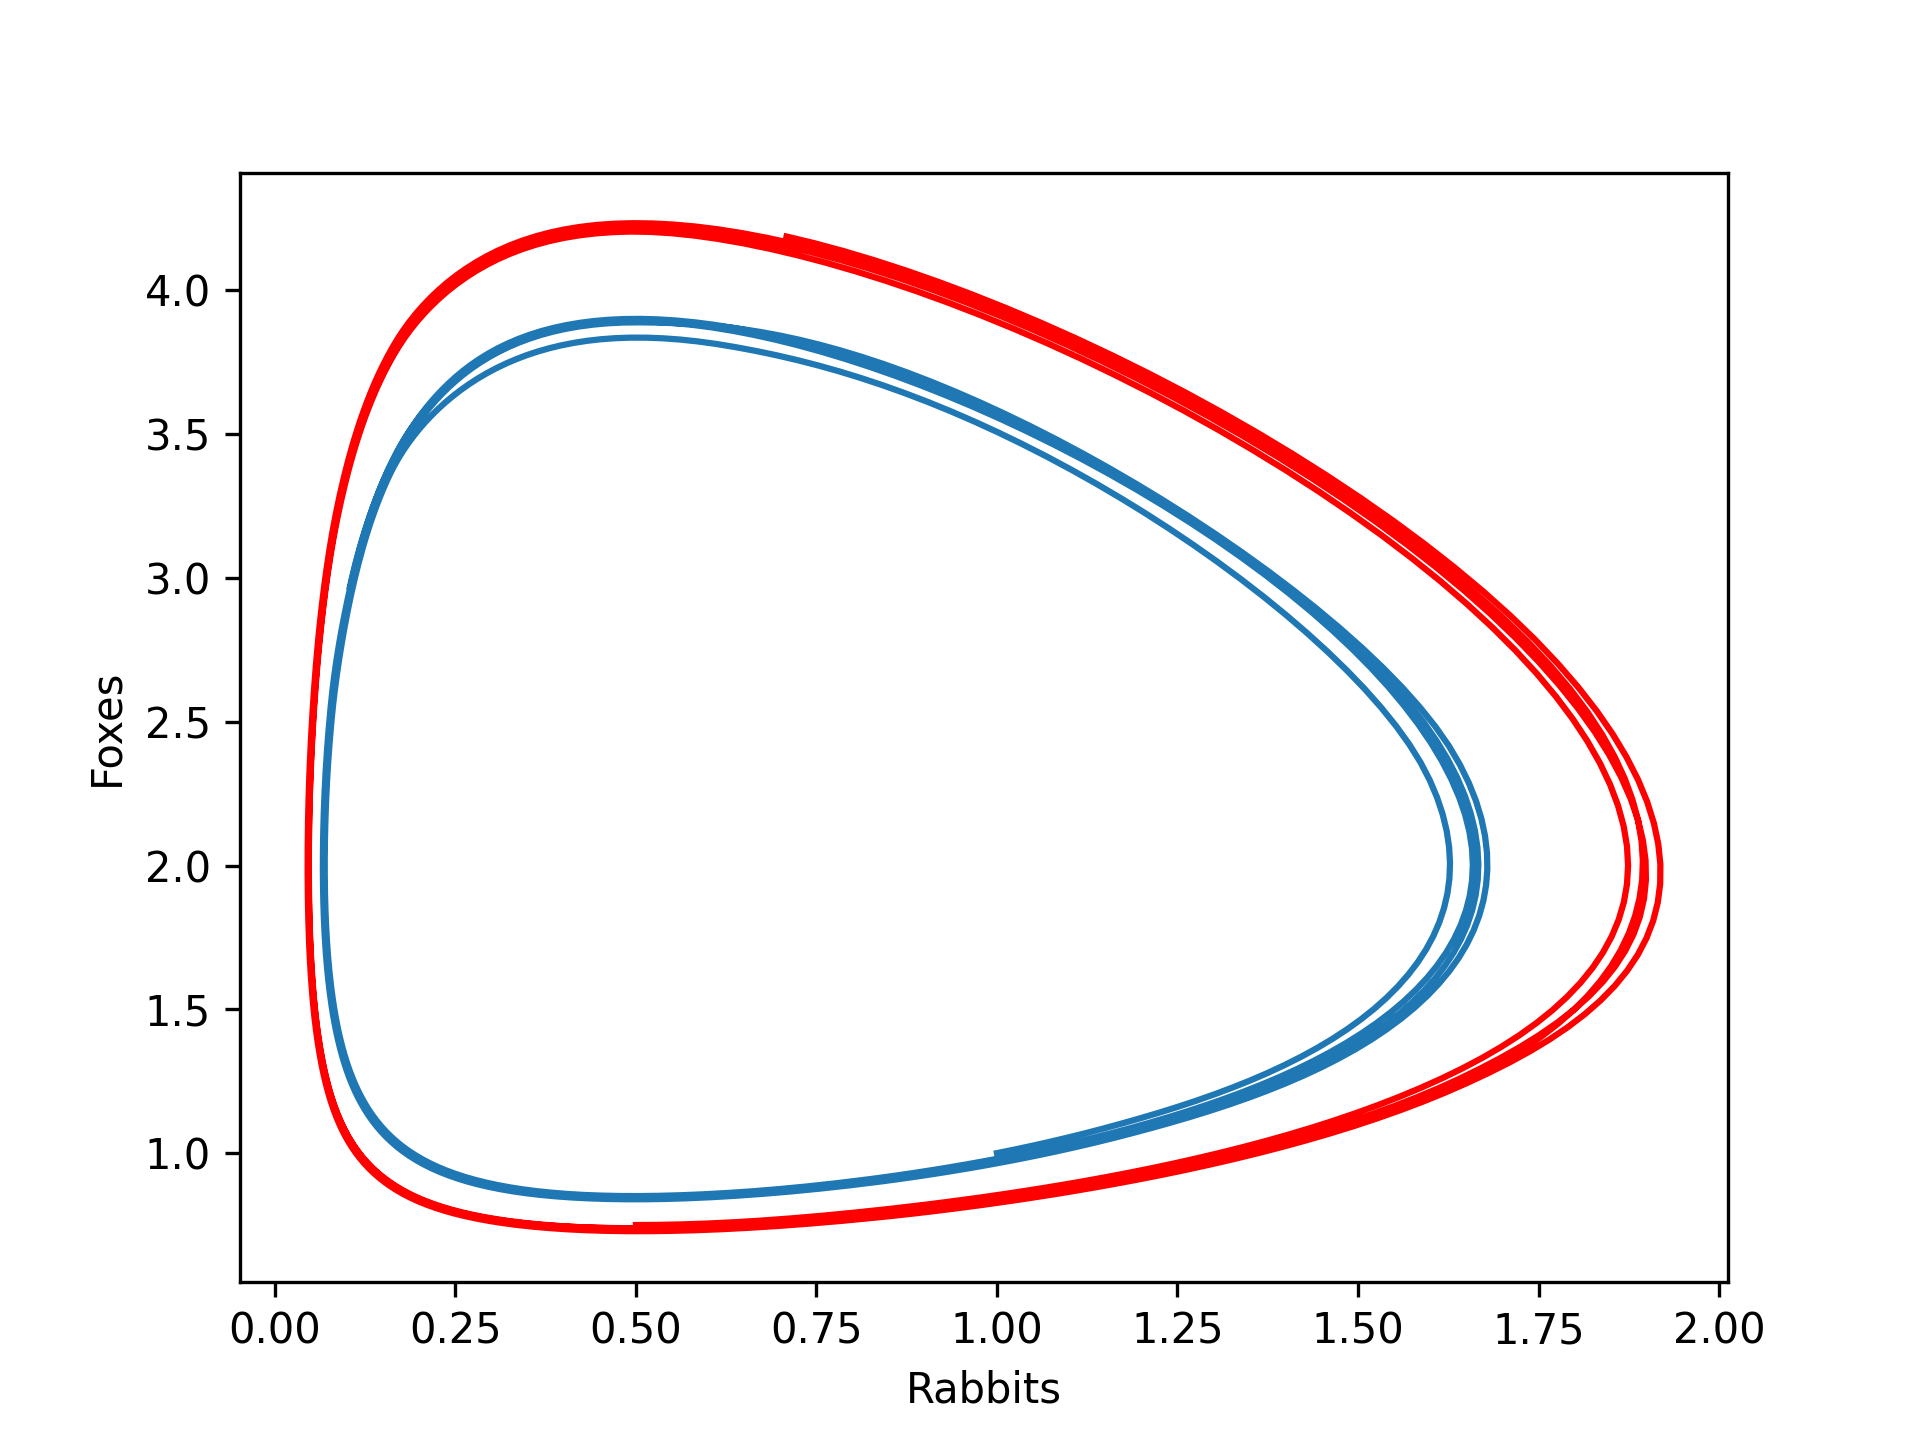

In [3]:
# Create a new figure
fig3, ax3 = plt.subplots()
# On the horizontal axis plot the rabbits
ax3.set_xlabel('Rabbits')
# On the vertical axis plot the foxes
ax3.set_ylabel('Foxes')

ax3.plot(rabbits, foxes)

We will talk a bit about how to analyze this. But can you see what's happening? How do the populations behave and relate to one another?

We can also see what happens with a different initial condition, e.g., if there are fewer initial Rabbits and foxes we'd end up with something like we have below.

<IPython.core.display.Javascript object>


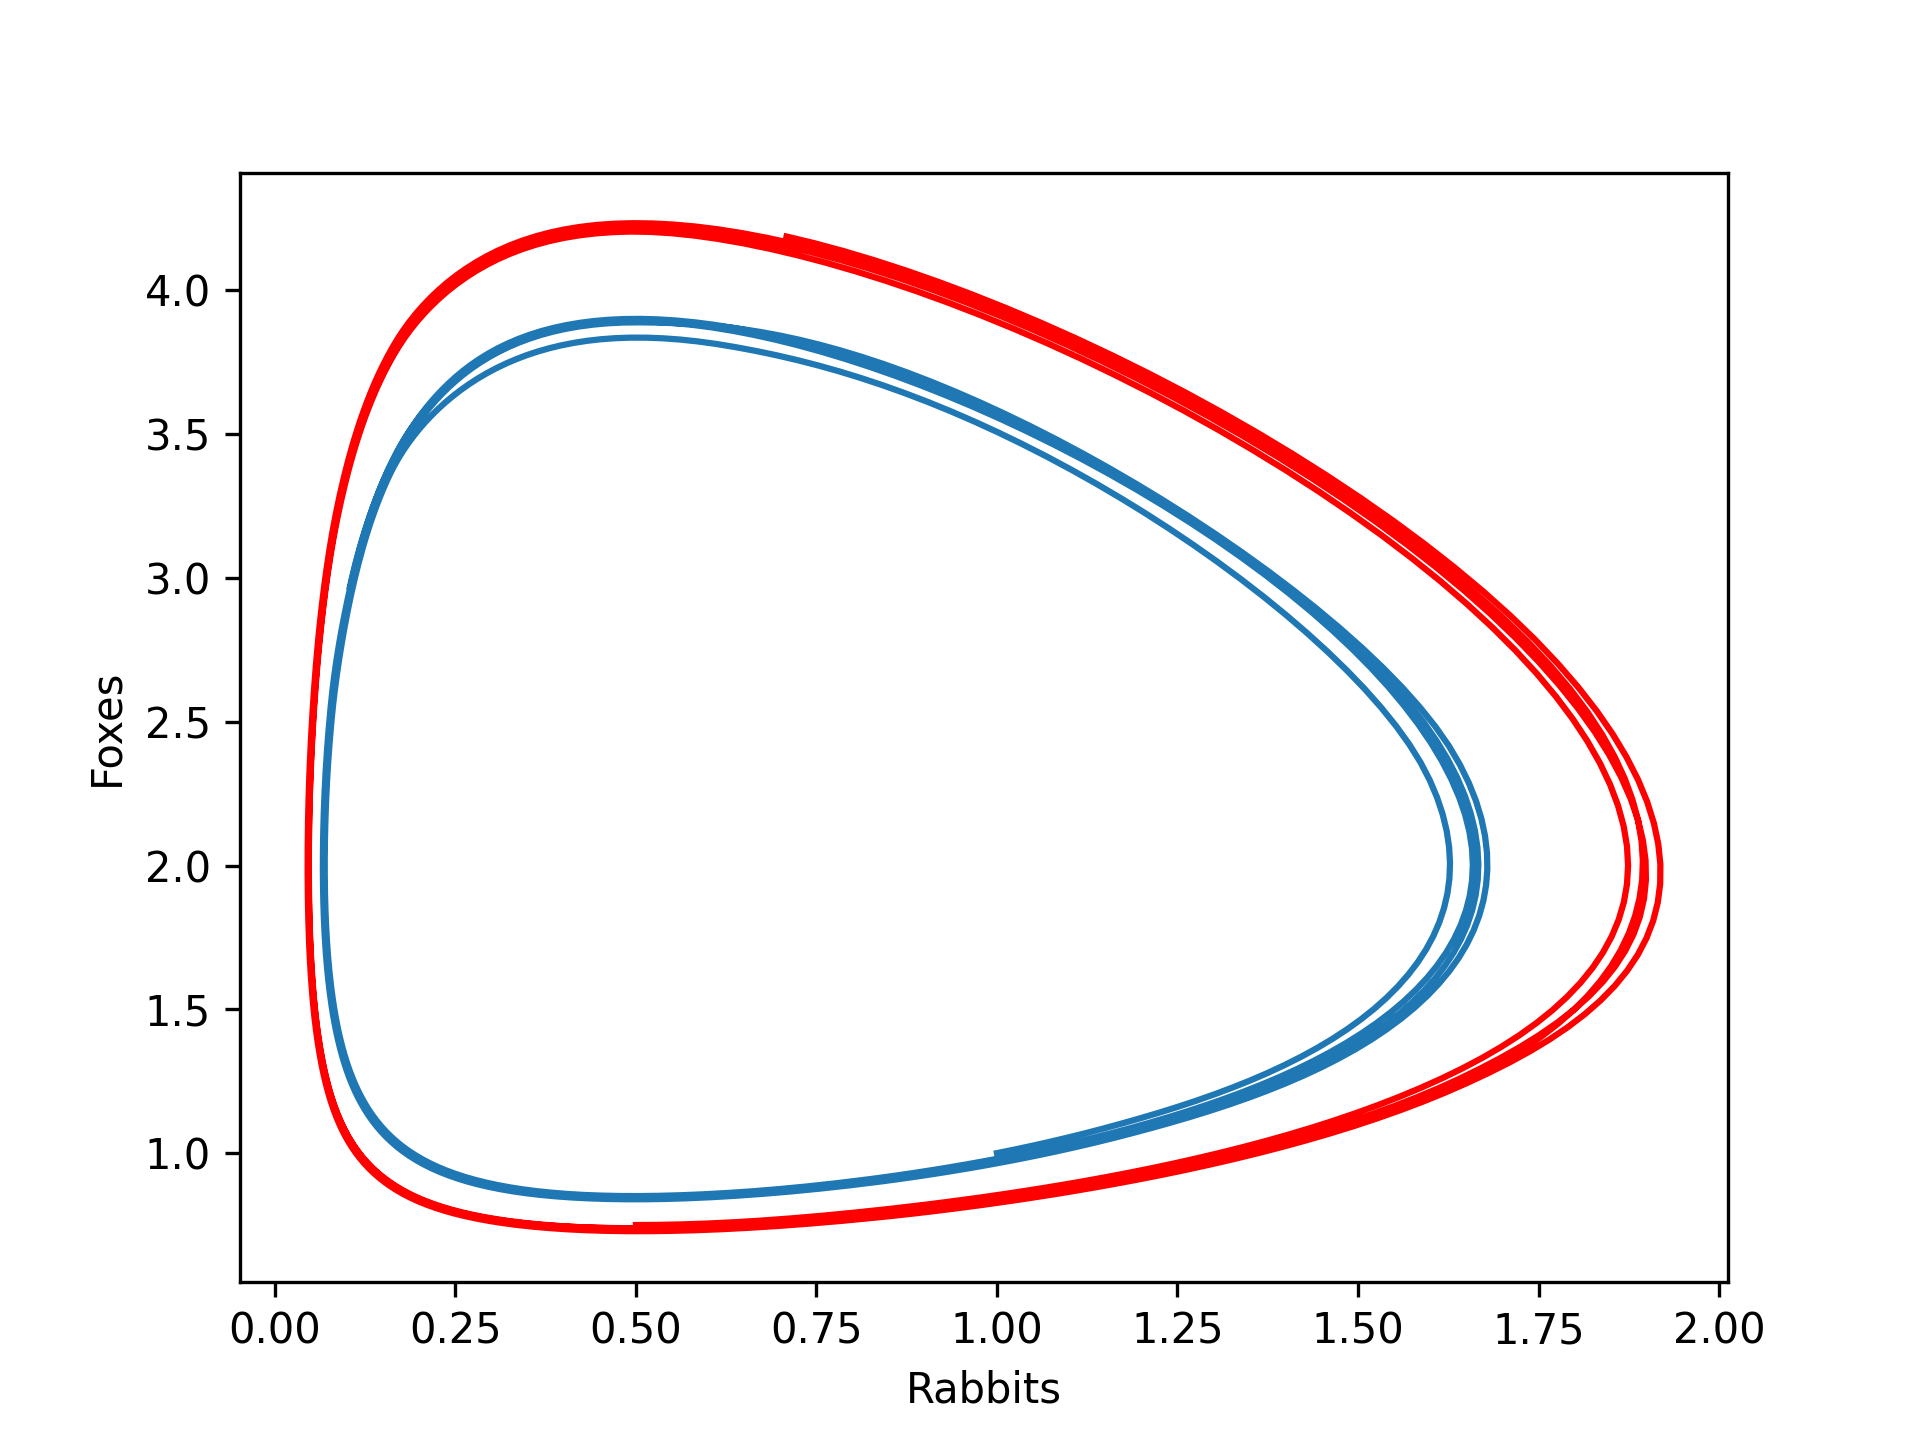

In [4]:
# Use a different initial condition
v0 = np.array([0.5, 0.75]) # .5 rabits, 0.75 foxes

# Then solve as before!
sol = scipy.integrate.solve_ivp(odefun, np.array([tspan[0], tspan[-1]]), v0, t_eval = tspan)
tsol = sol.t
vsol = sol.y
rabbits = vsol[0]
foxes = vsol[1]
ax3.plot(rabbits, foxes, 'r')

fig3

## Population example 2: Competing species

In this example, we will let $x(t)$ be the population of rabbits and $y(t)$ represent the population of *sheep*. These two animals don't kill eachother for food, but they do compete for the same food resource: grass. The differential equations modeling their competition are:
$$
\frac{dx}{dt} = x(3-x) - 2xy\\
\frac{dy}{dt} = y(2-y) -xy ,
$$
with initial conditions
$ x(0) = 3.5, ~y(0) = 1.$ We will solve for $0 \leq t \leq 10$.

We will start by plotting the vector field. Since we now have $x$ (or rabbits) on the horizontal axis and $y$ (sheep) on the vertical axis, the arrows we plot will be 
$$
\frac{dy}{dx} = \frac{dy/dt}{dx/dt}.
$$

<IPython.core.display.Javascript object>


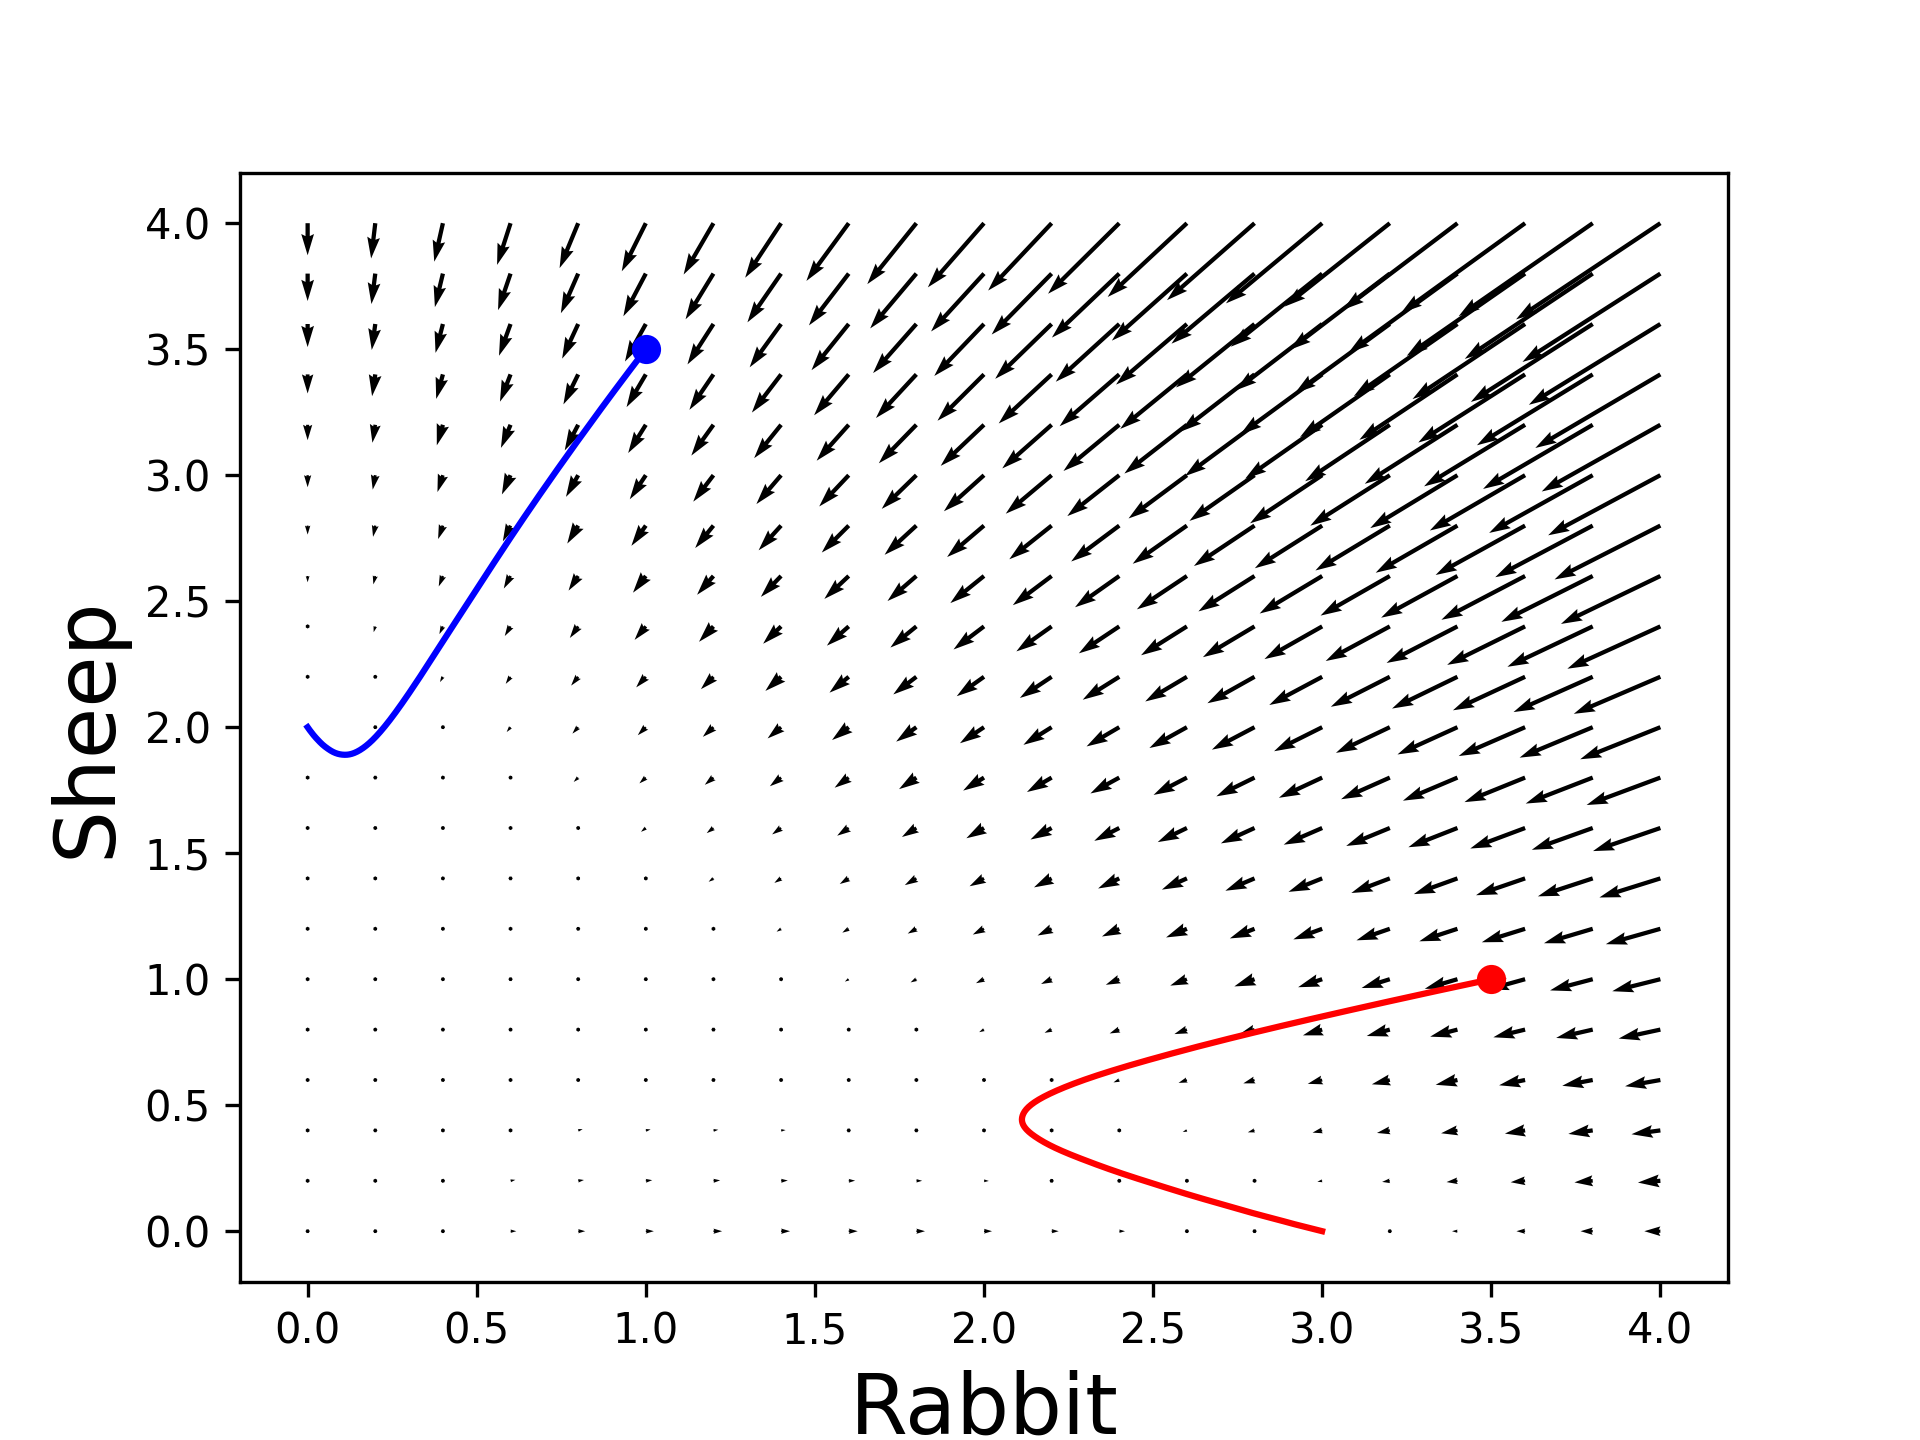

In [5]:
# Start by plotting the vector field.
# To do so, we need to define the differential equations.
# Define dx/dt
dxdt = lambda x, y: x*(3-x) - 2*x*y
# Define dy/dt
dydt = lambda x, y: y*(2-y) - x*y

# Now define a meshgrid. 
# To do so, use 21 equally spaced points in the x
# and y directions, from 0 to 4.
xvec = np.linspace(0, 4, 21)
yvec = np.linspace(0, 4, 21)
# Then define the meshgrid
X, Y = np.meshgrid(xvec, yvec)

# Now make a quiver plot. X, Y are the positions
# and the slopes come from the dxdt and dydt equations
fig4, ax4 = plt.subplots()
ax4.quiver(X, Y, dxdt(X,Y), dydt(X,Y))

The arrows are kind of hard to see, but we can see what happens far away from the origin. Things quickly move towards the origin ($x=y=0$ means both species die out).

(2, 1000)


<IPython.core.display.Javascript object>


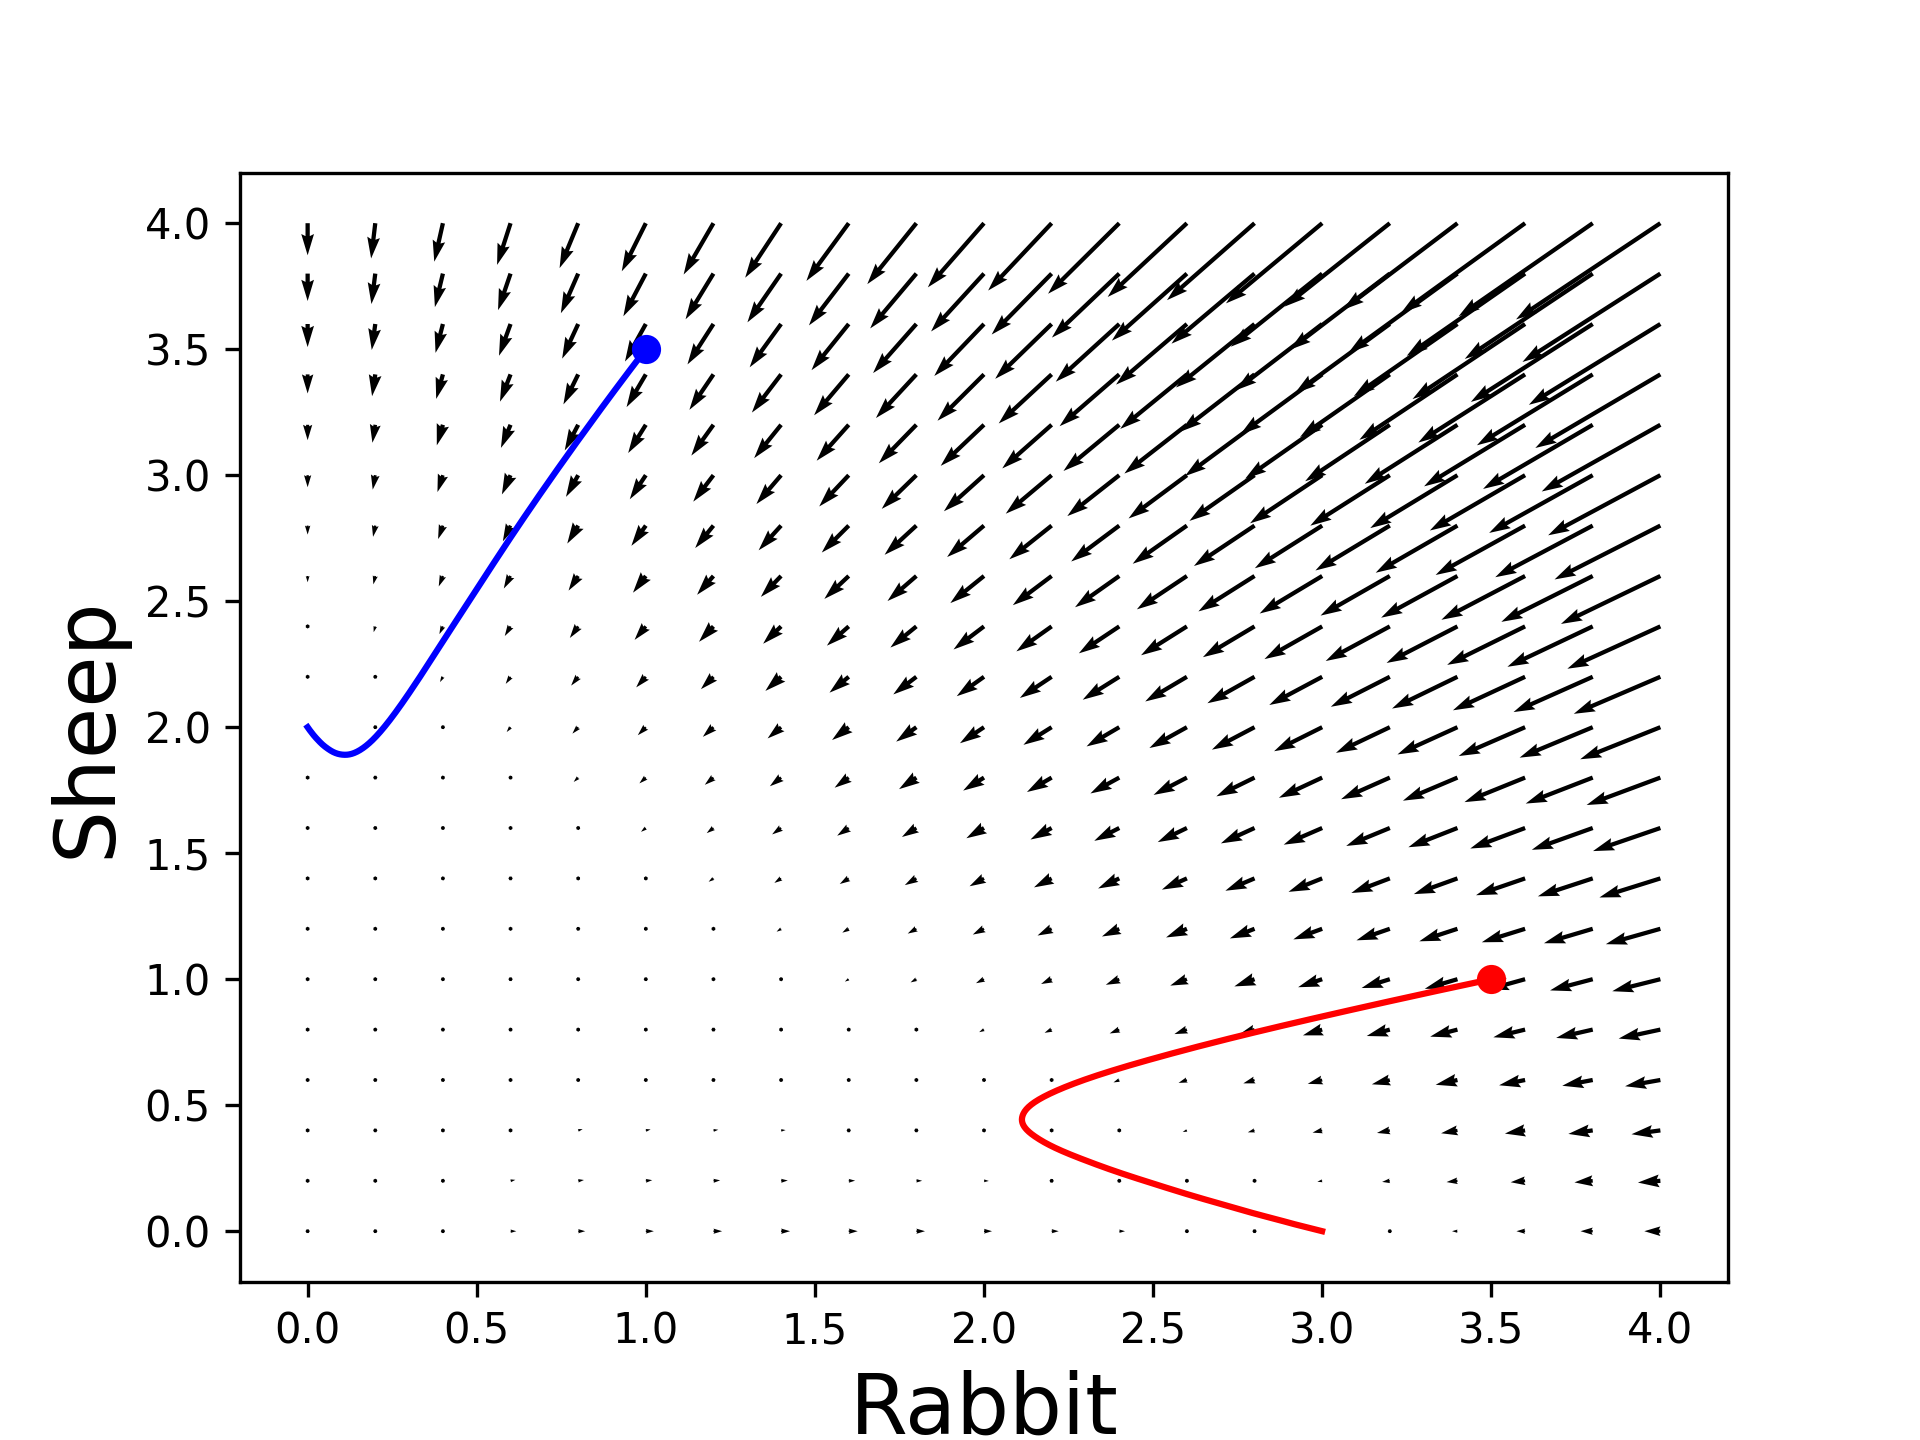

In [6]:
# Define the combination: odefun
odefun = lambda t, v: np.array([dxdt(v[0],v[1]), dydt(v[0],v[1])])
# Define the initial condition
v0 = np.array([3.5, 1])
# Define tspan, from 0 to 10. 
# Choose 1000 equally spaced to make the curves look smooth
tspan = np.linspace(0,10,1000)
# Solve the ODE
sol = scipy.integrate.solve_ivp(odefun, np.array([tspan[0], tspan[-1]]), v0, t_eval = tspan)
# Record the solution
tsol = sol.t
vsol = sol.y
print(vsol.shape)
# Plot the initial condition as a red dot
# vsol is of size 2x1000.
# The initial condition is in the first row, 0th column
ax4.plot(vsol[0, 0], vsol[1, 0], 'or')
# Then plot the solution as a red curve
# The rabbits are the 0th row, all columns, 
# the sheep are the 1st row, all columns
ax4.plot(vsol[0,:], vsol[1,:], 'r')
# Label the axes
ax4.set_xlabel('Rabbit', fontsize=20)
ax4.set_ylabel('Sheep', fontsize=20)
fig4

We see that the sheeps die out and the rabbits reach a steady-state population. What happens if we started with more sheep? Let's flip the initial condition, using $(x(0), y(0)) = (1, 3.5)$.

<IPython.core.display.Javascript object>


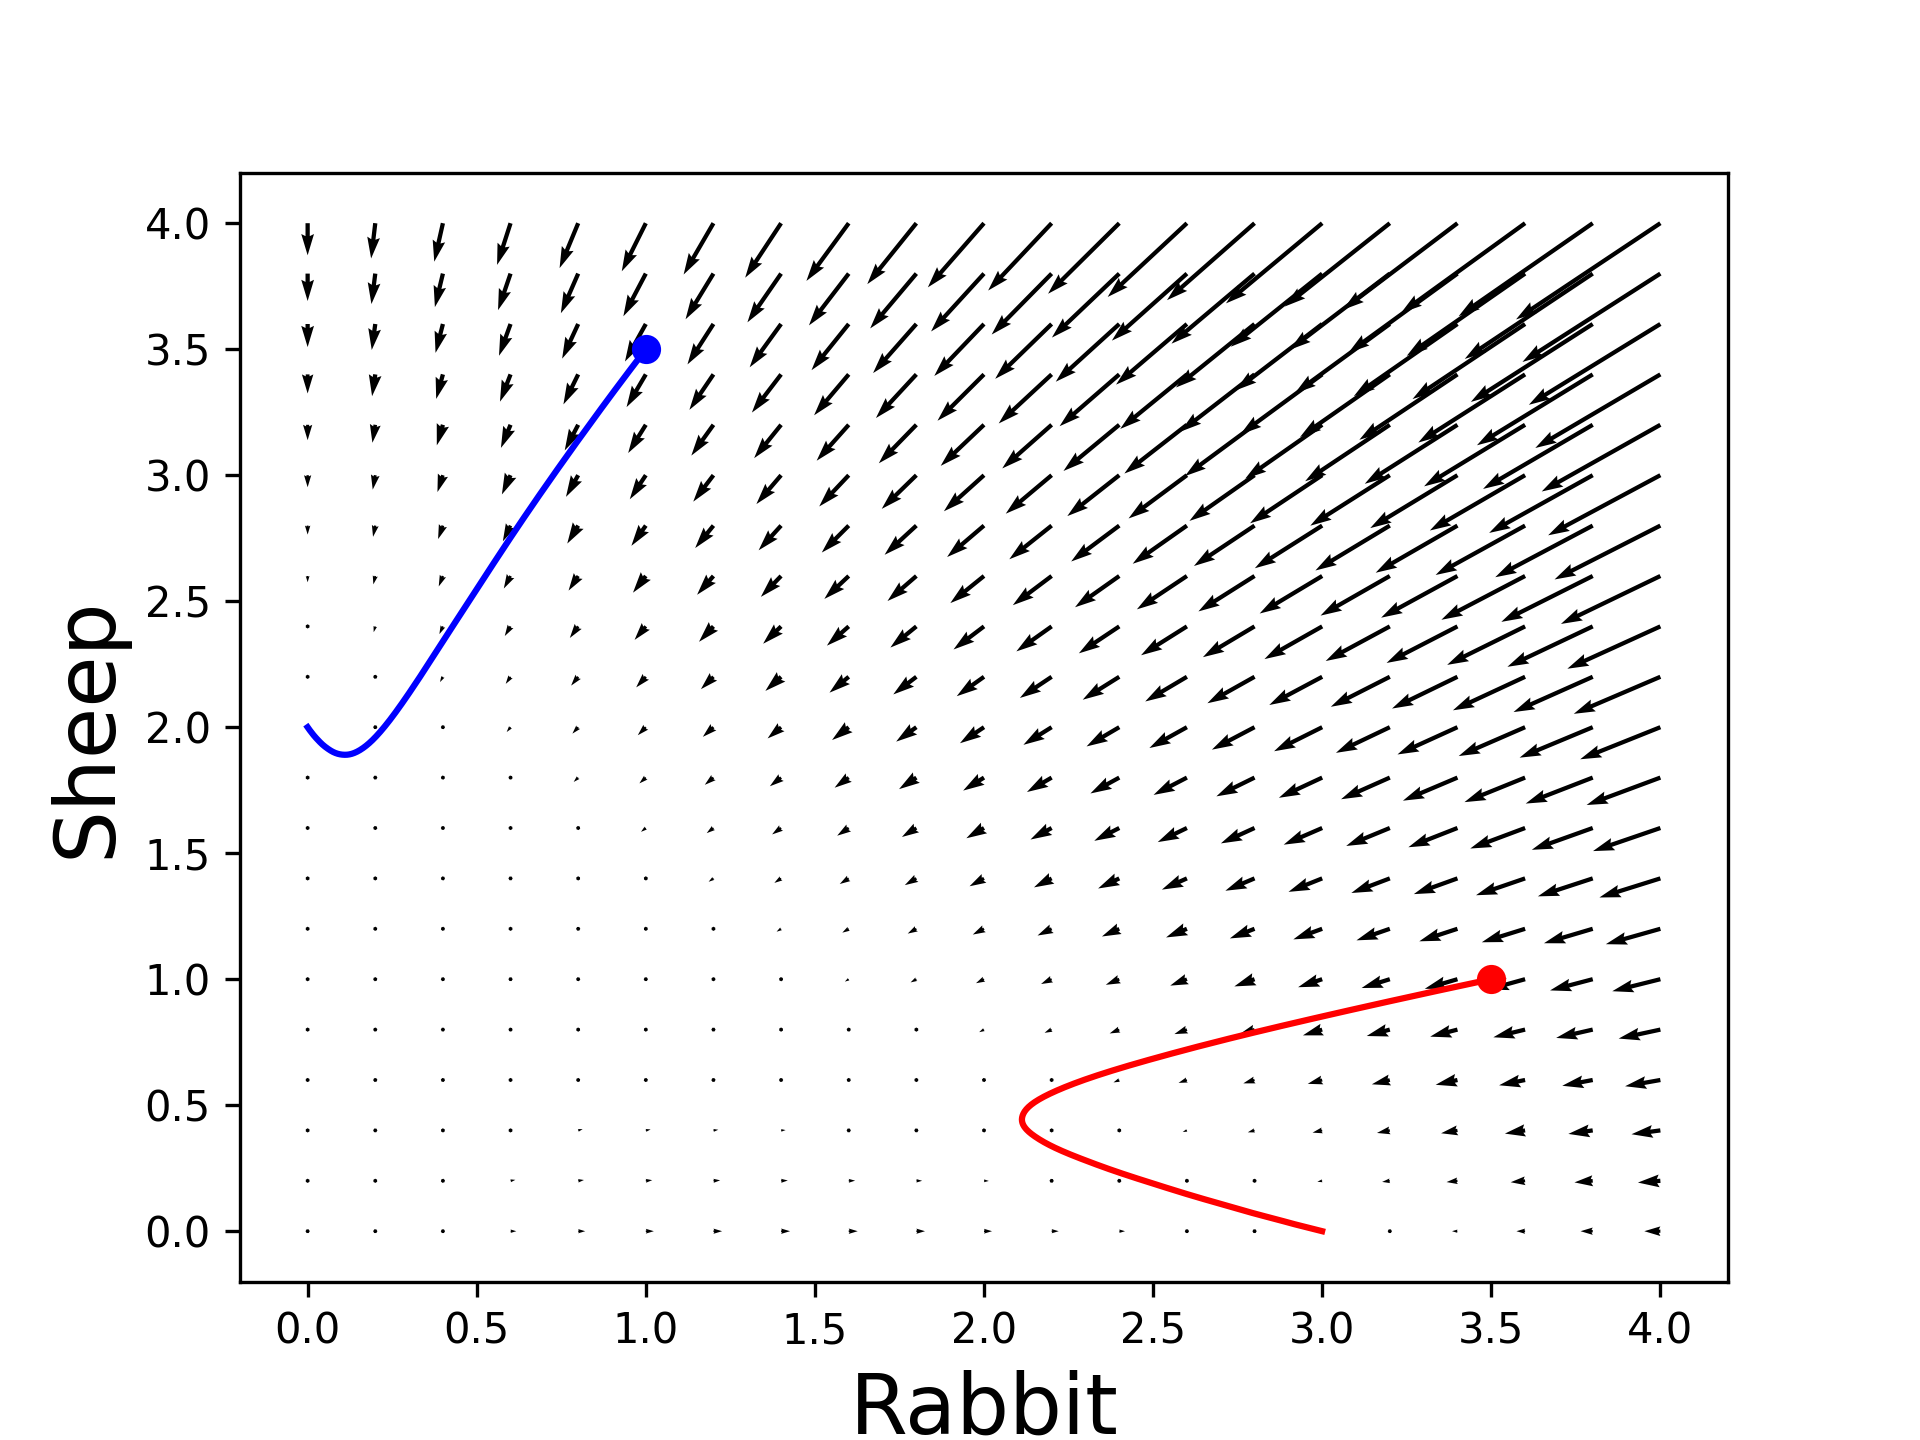

In [7]:
# Define the new initial condition
v0 = np.array([1, 3.5])

# Solve the ODE
sol = scipy.integrate.solve_ivp(odefun, np.array([tspan[0], tspan[-1]]), v0, t_eval = tspan)
# Record the solution
tsol = sol.t
vsol = sol.y
# Plot the initial condition as a blue dot

ax4.plot(vsol[0, 0], vsol[1, 0], 'ob')
# Then plot the solution as a blue curve
# The rabbits are the 0th row, all columns, 
# the sheep are the 1st row, all columns
ax4.plot(vsol[0,:], vsol[1,:], 'b')

fig4

We see that in this case the rabbits die off and the sheep reach a steady-state population. 

### Other examples of multiple-dimensional ODEs.
#### Chemical reactions
We have seen a few examples above of 2-dimensional ODEs. You can probably think of some other examples of two "species" interacting. Another example is in chemical reactions with two chemics, e.g.,
$$
\begin{align*}
A + X \to 2X \text{ with reaction rate }k_1\\
X + Y \to 2Y \text{ with reaction rate } k_2\\
Y \to B \text{ with reaction rate }k_3
\end{align*}
$$
corresponds to the ODEs
$$
\begin{align*}
\frac{d[A]}{dt} &= -k_1 [A] [X]\\
\frac{d[X]}{dt} &= k_1 [A] [X]  - k_2 [X] [Y]\\
\frac{d[Y]}{dt} &= k_2 [X] [Y] - k_3 [Y]\\
\frac{d[B]}{dt} &= k_3 [Y],
\end{align*}
$$
where $[Z]$ is the concentration of the compound $z$. This is a **4-dimensional ODE.**

#### The Lorenz system
This system originally arose from weather models, but is now mostly used as a simple example of some interesting concepts from differential equations.  In particular, it is the simplest example of a differential equation that exhibits *chaos.*

The formulas for this system are 

$x'(t) = 10(y - x)$, 

$y'(t) = x(28 - z) - y$, 

$z'(t) = xy - \frac{8}{3}z$.  

The initial conditions don't make much of a difference, but we will use $x(0) = 1$, $y(0) = 0$ and $z(0) = 20$ because they give good pictures.  We can solve this system with any of the methods we described so far.  For example, we can use `solve_ivp`.  

<IPython.core.display.Javascript object>


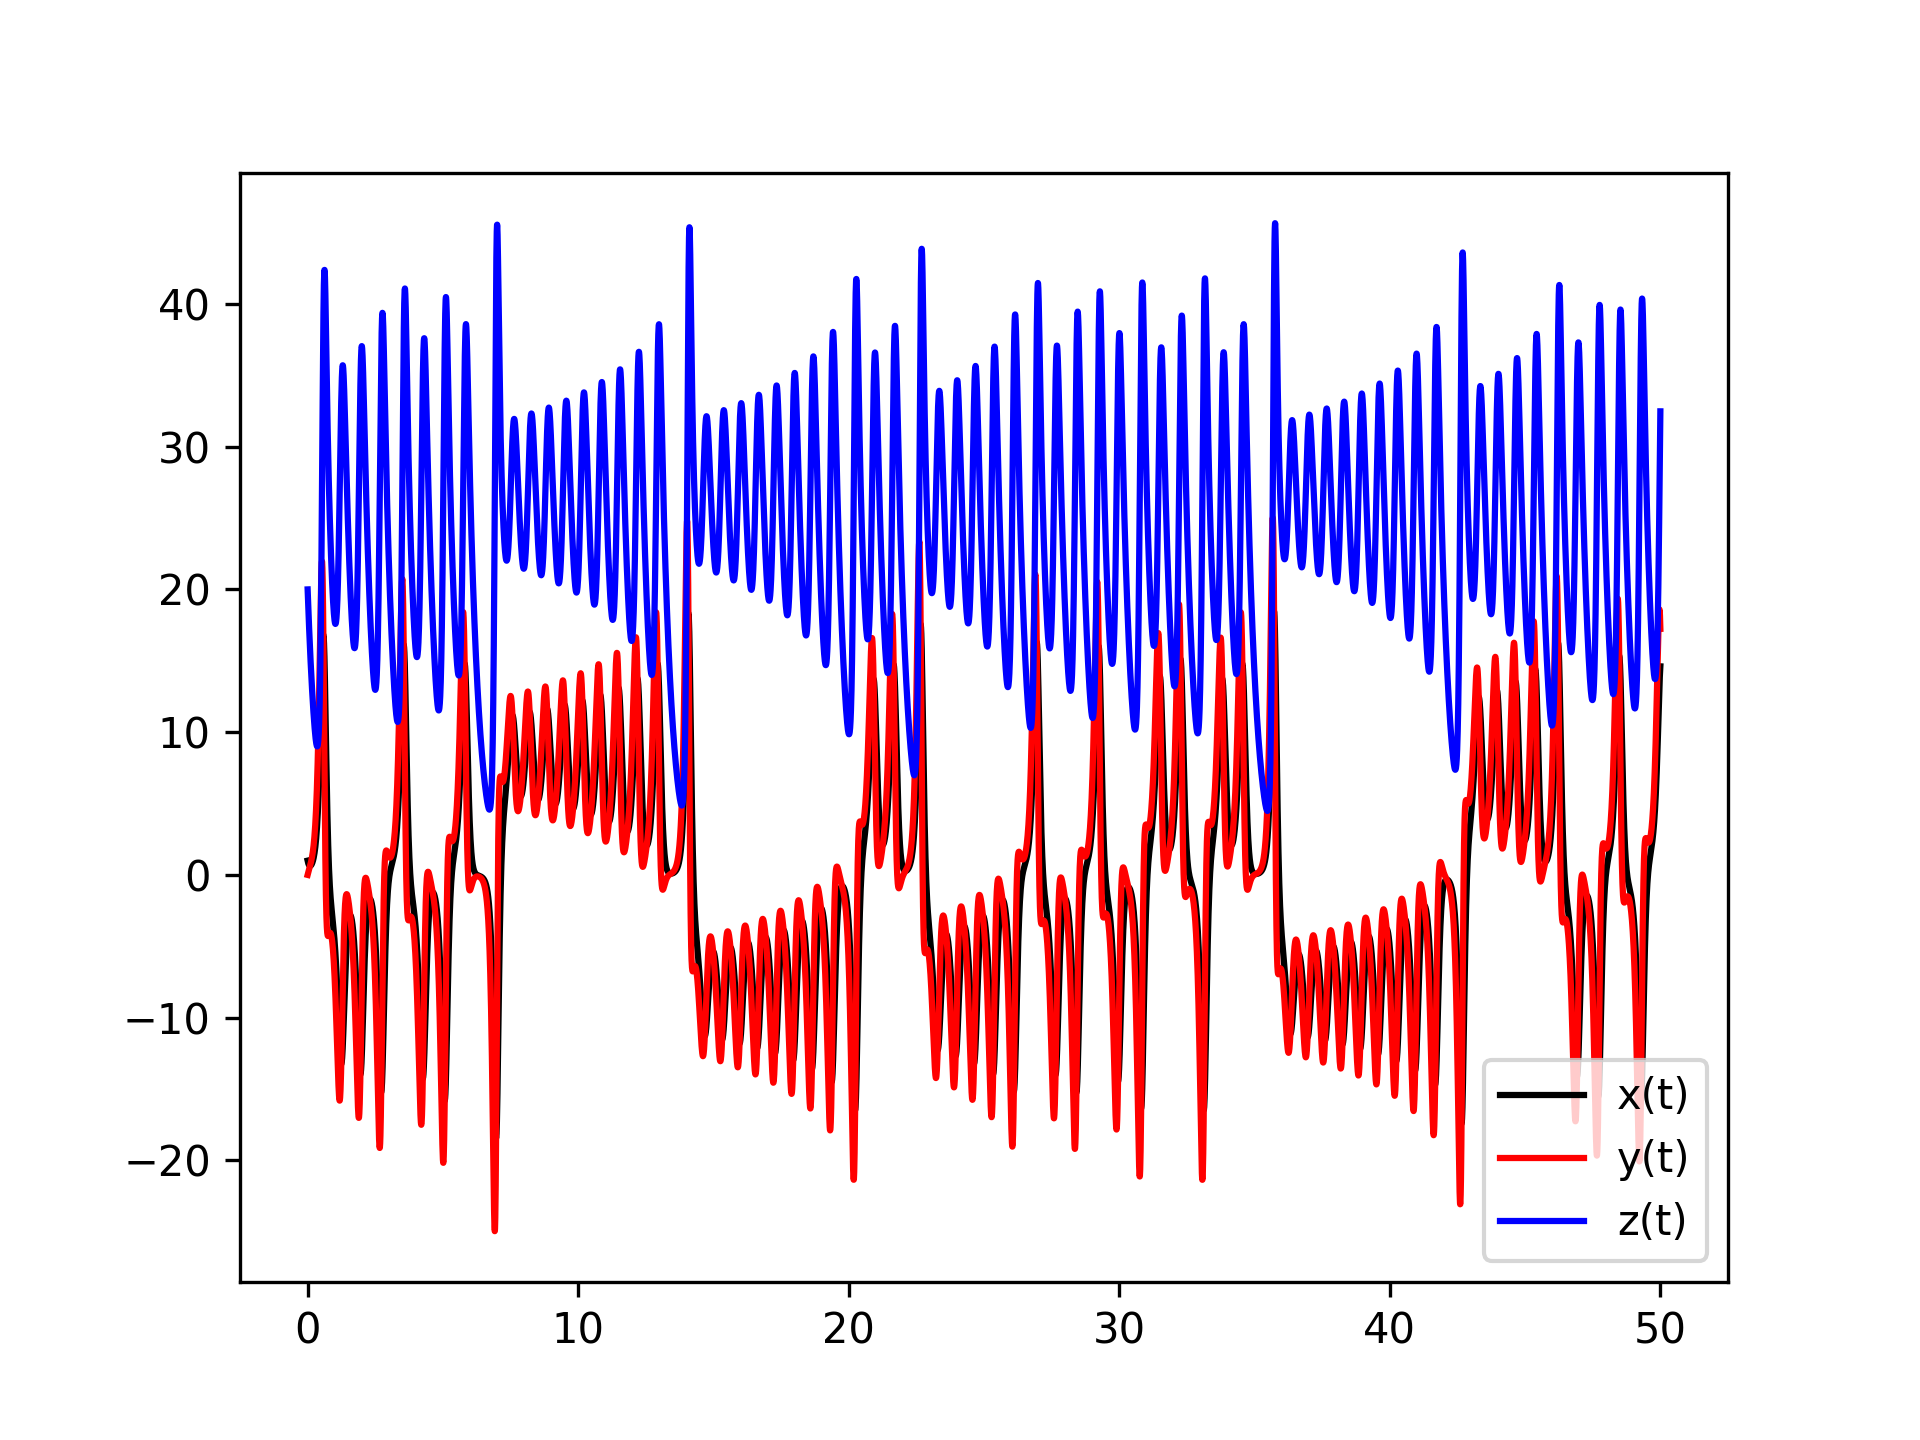

In [8]:
# Define dxdt, dydt, and dzdt
dxdt = lambda x, y, z: 10*(y-x)
dydt = lambda x, y, z: x*(28-z)-y
dzdt = lambda x, y, z: x*y-8*z/3
# Then define the "adapter" ODE
f = lambda t, v: np.array([dxdt(v[0], v[1], v[2]), 
                           dydt(v[0], v[1], v[2]),
                           dzdt(v[0], v[1], v[2])])
# Define the initial condition
v0 = np.array([1, 0, 20])
# We will solve up until T = 50
T = 50
# Define t as 10000 linearly spaced points between 0 and T
# to make the figures smooth (remove t_eval = t to see the difference)
t = np.linspace(0, 50, 10000)
sol = scipy.integrate.solve_ivp(f, [0, 50], v0, t_eval=t)

# Then extract the solutions
x = sol.y[0, :]
y = sol.y[1, :]
z = sol.y[2, :]

plt.figure()
plt.plot(t, x, 'k', label='x(t)')
plt.plot(t, y, 'r', label='y(t)')
plt.plot(t, z, 'b', label='z(t)')
plt.legend()

The solutions do not appear to exhibit much of a pattern, but we still call this "stable" behavior because the solutions stay between -30 and 50 instead of drifting off to infinity (we'll get back to this definition at the end of this lecture).  It is easier to see what's going on if we look at the phase portrait/diagram.

<IPython.core.display.Javascript object>


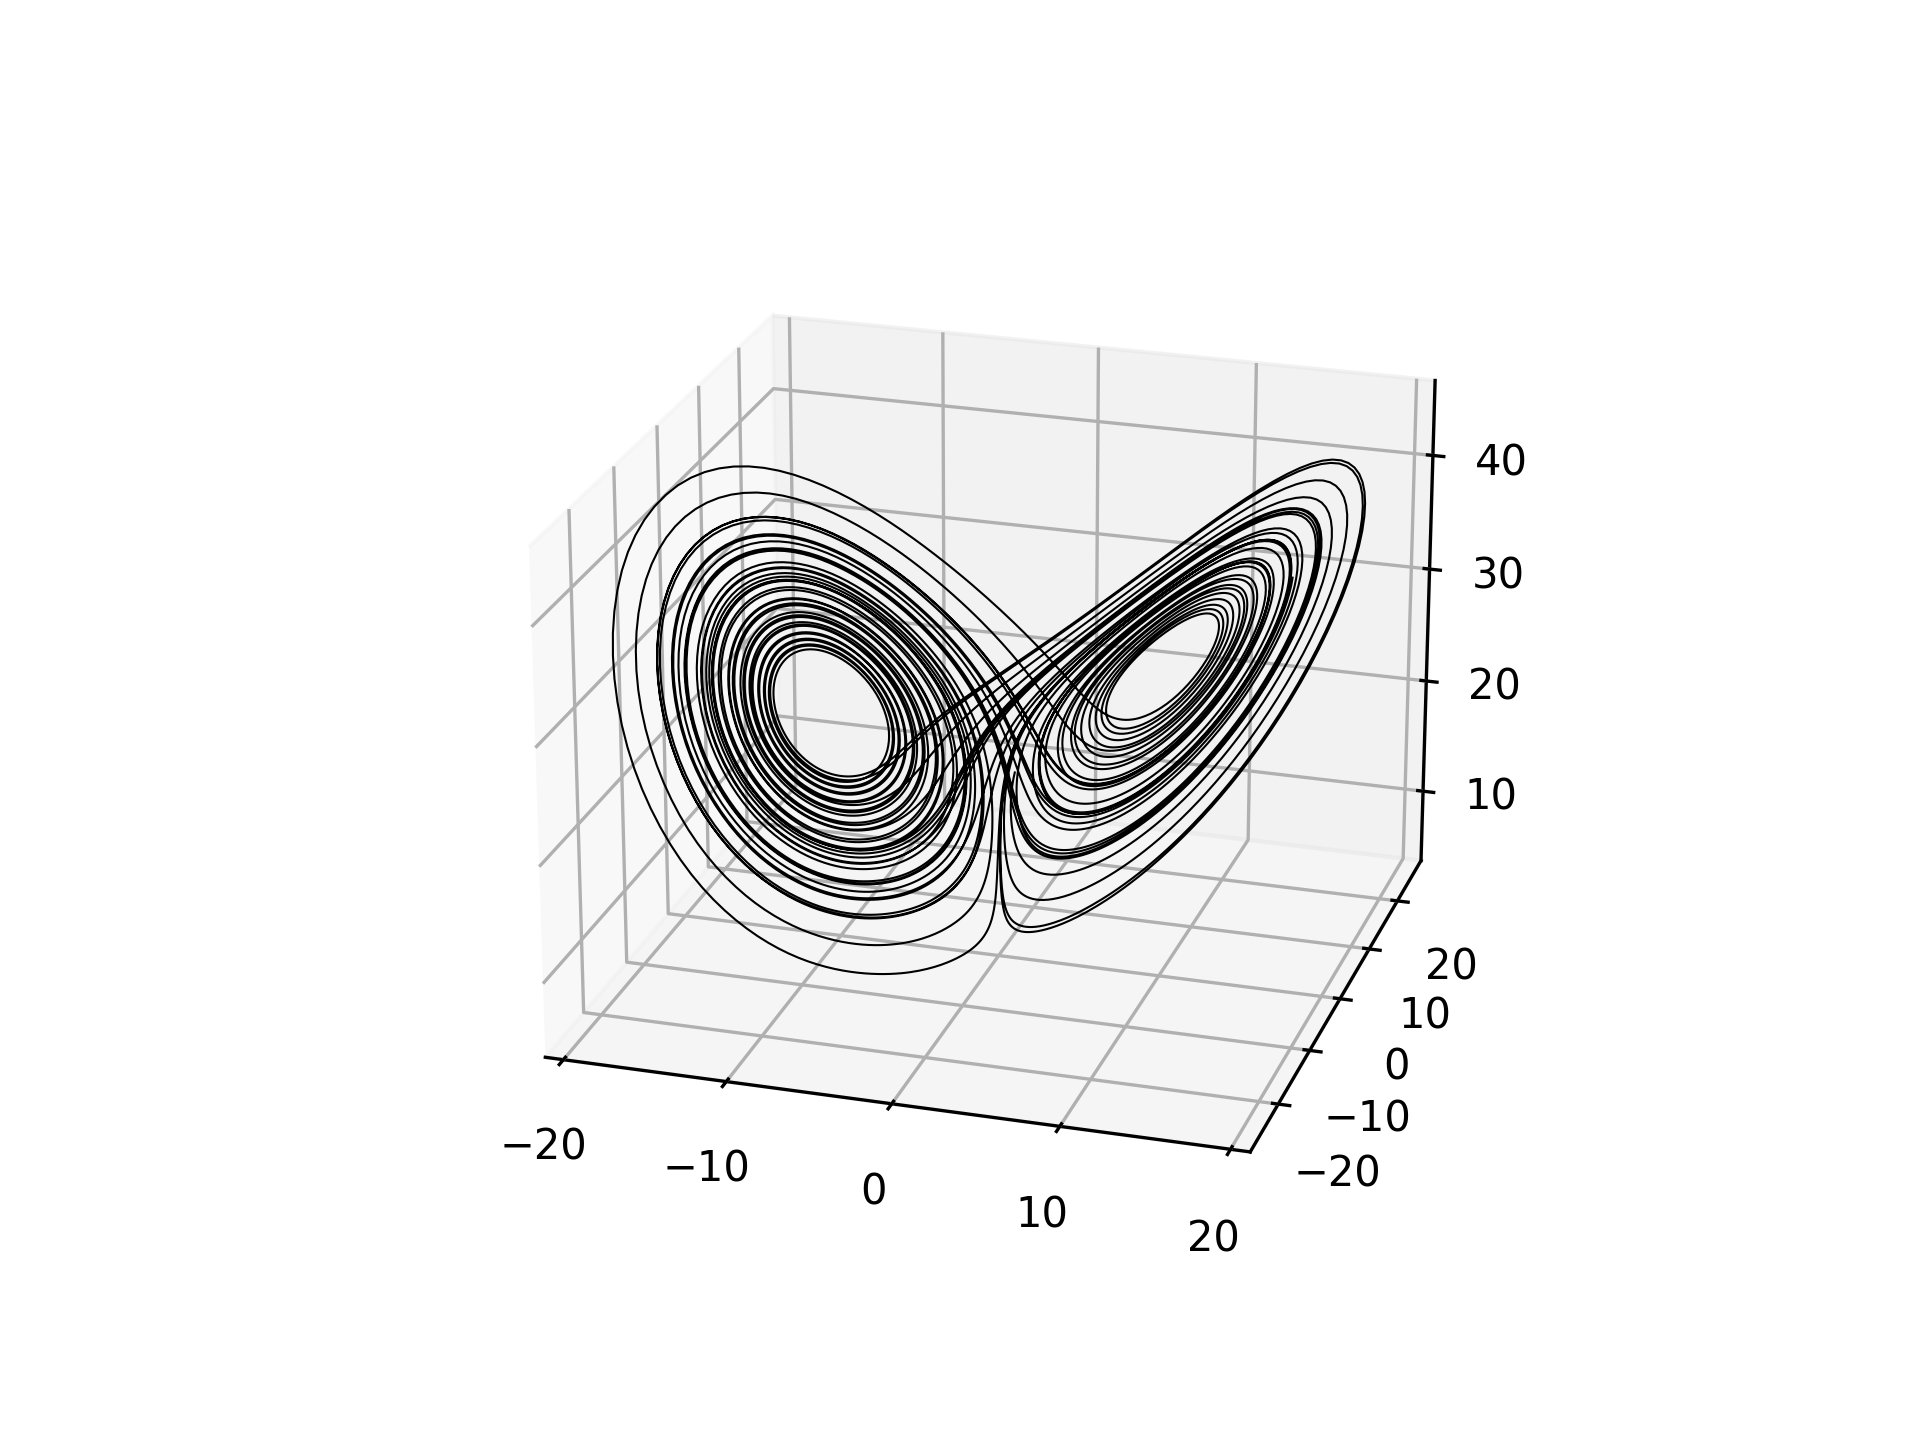

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.plot(x, y, z, 'k', linewidth=0.5)
ax.view_init(20, -80)

(The `view_init` function and `linewidth` option are just to make the graph easier to see.)  This figure-eight pattern is called the *Lorenz attractor*.  It is an example of a *strange attractor* (you don't need to know this or what it is, but it's a cool example). No matter what initial condition you start with, the solutions of the Lorenz system will be pulled into this attractor and follow this figure-eight shape.  

## Second-order ODEs

Higher-dimensional ODEs show up in many applications, but one of the major reasons we study them is because *higher-order ODEs can be converted to higher-dimensional first-order ODEs.* To explain that, I need to define some things. What is the *order* of a differential equation? So far we have *only been looking at ODEs with **one** derivative.* **If an ODE only has first-derivatives, then it is a first-order ODE.** If an ODE has a second-order derivative, then it is a **second-order ODE.** The *order* corresponds to the highest derivative.

Historically, of most interest are the second-order ODEs because they come from $F=ma$ (and are the next easiest after first-order ODEs). The reason that $F=ma$ is a second-order ODE is because $a = x''(t)$, if $x(t)$ represents a position. 

##### The nonlinear pendulum equation without damping

As an example, we will consider the ODE
$$ -\frac gL \sin(\theta(t)) = \theta''(t),$$
where $g$ is gravity and $L$ is the length of the pendulum, which is of the form $F = ma = m\theta''(t)$, with $m=1$. *This is almost the same ODE that you have on your homework. The only difference is that on the homework we add in another force, due to damping.* The ODE you have on the homework is
$$
\theta''(t) = -\frac gL \sin(\theta(t)) - \sigma \theta'(t).
$$
Luckily, we don't need to develop a whole new set of IVP solving tools to solve these second-order ODEs. Instead, we rely on converting this second-order ODE to a first-order ODE and using the tools we already have. *This is why we have only talked about (and only ever talk about) ODE methods for first-order ODEs.* 

The trick to converting to first-orded ODEs is to define a new variable, $v(t) = \theta'(t)$. Then we notice that $v'(t) = \theta''(t)$, but from the definition of our second-order ODE we have 
$$
v'(t) = \theta''(t) = -\frac gL \sin(\theta(t)) - \sigma \theta'(t).
$$
Therefore we have gone from *one second-order ODE* to *two first-order ODEs*
$$
\begin{align*}
\theta'(t) &= v(t) \\
v'(t) &= -\frac gL \sin(\theta(t)) - \sigma v(t),
\end{align*}
$$
where I have used that $\theta'(t) = v(t)$ in the second ODE. **You should know how to do this. This is an important skill for solving higher-order ODEs** and it is something that you will encounter in the future. For future reference, if you have an $n$th-order ODE, it would be converted to $n$ first-order ODEs. You need to keep defining new variables to get rid of all of the higher-order derivatives.

Something is weird about this though, and that is that we need to think about $\theta(t)$ and $v(t)$ as independent variables. That feels a bit weird, because *once you know $\theta$, then you also know the velocity $\theta'$!* The way we need to think about these two ODEs is: at any random point in time, $t$, it is possible for any combination of $\theta$ and $v$. The phase portrait helps us with this. I am going to show the (incomplete) phase portrait here without showing code, because you are asked to create this on your homework. 
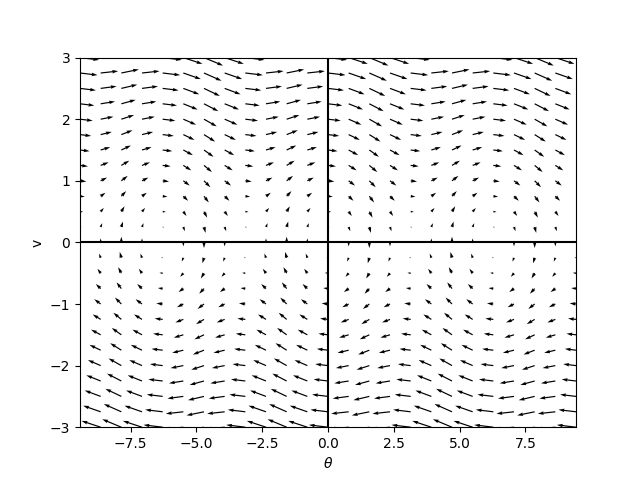

# Stability and stiff ODEs
Way back when we started talking about ODEs I told you that one of the things we would study is about *stability*. Remember that stability has to do with how our solution behaves if we make the final time $T$ very large.  This turns out to be a very complicated concept, and it often depends on the details of our differential equation, so we will only look at one of the simplest versions of stability.  In particular, we will only talk about stability in terms of a very simple type of differential equation,

$\dot{x} = \lambda x$ and $x(0) = x_0$, 

where $\lambda$ is a constant.  (It turns out that when we try to solve systems of equations we will need to worry about complex values of $\lambda$, but for the moment we will just pretend that $\lambda$ is real.)  This is called a *test problem*.  

**Note:** I am trying to avoid more technical definitions of stability and some of the more complicated concepts from differential equations.  Unfortunately, this means that I am also using somewhat non-standard definitions of words like "stable" and "unstable".  If you are interested in the standard definitions, a good place to start is by looking up "A-stability".  

We have seen that the true solution to the test problem is 

$x(t) = x_0e^{\lambda t}$.  

We want to know what happens to this solution (and to our approximations, but let's start with the true solution) after a very long time.  In this case, there are only two possibilities.  If $\lambda > 0$, then $x$ goes off to $\pm\infty$ as time goes on.  We will call the true solution "unstable" in this case.  If $\lambda < 0$, then $x$ goes to zero as time goes on.  We will call the true solution "stable" in this case.  (Technically, there is a third possibility.  If $\lambda = 0$, then $x(t)$ stays constant forever.  However, this is a *degenerate* (uncommon) case, so we won't worry about it here.)

Ideally, we want our numerical methods to capture this stable/unstable behavior.  That is, if we solve this initial value problem using something like the forward or backward Euler method, we want our approximation to go to infinity when $\lambda > 0$ and to go to zero when $\lambda < 0$.  Unfortunately, it turns out that this is not actually possible.  We will always have some tradeoff where our approximation goes to infinity even though the true solution does not, or vice versa.  

## Stability of Forward Euler
Let's look at what happens when we apply the forward Euler method to the test problem.  If we already know all of the $x$ values up to $x_k$, then we can find the next $x$ value using the equation 

$x_{k+1} = x_k + \Delta t f(t_k, x_k)$.  

In this case, $f(t, x) = \lambda x$, so we have 

$x_{k+1} = x_k + \Delta t \lambda x_k = (1 + \Delta t\lambda)x_k$.  

If we use this formula with $k = 0$, then we find 

$x_1 = (1 + \Delta t\lambda)x_0$.  

Likewise, if we use $k = 1$ then we find 

$x_2 = (1 + \Delta t\lambda)x_1 = (1 + \Delta t\lambda)^2x_0$.  

It is easy to check that if we repeat this process $k$ times we will get the general formula 

$x_k = (1 + \Delta t\lambda)^kx_0$.  

From this equation we can see that our approximations $x_k$ go to $\pm\infty$ if $|1 + \Delta t\lambda| > 1$.  If this is the case then we say that forward Euler is "unstable".  Likewise, if $|1 + \Delta t\lambda| < 1$ then our approximations $x_k$ go to zero and we say that forward Euler is "stable".  

It is very important to notice that this is not the same as the stability of the true solution.  The true solution is stable whenever $\lambda$ is negative, but it is easy to come up with combinations of $\Delta t$ and $\lambda$ where $\lambda$ is negative, but forward Euler is unstable.  For instance, if $\Delta t = 1$ and $\lambda = -10$, then $|1 + \Delta t\lambda| = 9 > 1$, so forward Euler is unstable even though the true solution is stable.  However, it is easy to check that if $\lambda$ is positive then $|1 + \Delta t\lambda| > 1$, so if the true solution is unstable then so is the forward Euler approximation.  

We therefore know that the forward Euler solution is unstable whenever the true solution is unstable, but sometimes forward Euler is not stable even though the true solution is stable.  In particular, if $-2 < \Delta t\lambda < 0$, then the forward Euler approximation will be stable, but if $\Delta t\lambda < -2$ then the forward Euler approximation will be unstable (even though the true solution is actually stable).  

Notice that, for any fixed value of $\lambda$, if we choose $\Delta t$ small enough then the stability of our approximation will always match the stability of the true solution, but if $\lambda$ is negative then we might need a very small $\Delta t$ to make sure that forward Euler is stable.  

## Stability of Backward Euler
Similarly, we can look at what happens when we apply the backward Euler method to the test problem.  If we already know all of the $x$ values up to $x_k$, then we can find the next $x$ value using the equation 

$x_{k+1} = x_k + \Delta t f(t_{k+1}, x_{k+1})$.  

In this case, $f(t, x) = \lambda x$, so we have 

$x_{k+1} = x_k + \Delta t\lambda x_{k+1}$.  

This is an implicit equation, but it is very easy to solve for $x_{k+1}$.  We get 

$x_{k+1} = \frac{1}{1 - \Delta t\lambda}x_k$.  

If we use this formula with $k = 0$, we find that 

$x_1 = \frac{1}{1 - \Delta t\lambda}x_0$.  

Likewise, if we use $k = 1$ then we find 

$x_2 = \frac{1}{1 - \Delta t\lambda}x_1 = \left(\frac{1}{1 - \Delta t\lambda}\right)^2x_0$.  

It is easy to check that if we repeat this process $k$ times we will get the general formula 

$x_k = \left(\frac{1}{1 - \Delta t\lambda}\right)^{k}x_0$.  

From this equation we can see that our approximations $x_k$ go to $\pm\infty$ if $|1/(1 - \Delta t\lambda)| > 1$.  If this is the case then we say that backward Euler is "unstable".  Likewise, if $|1/(1 - \Delta t\lambda)| < 1$ then our approximations $x_k$ go to zero and we say that backward Euler is "stable".  

Just like with forward Euler, it is very important to notice that this is not the same as the stability of the true solution (or as the rule for forward Euler).  In particular, if $\lambda$ is positive then the true solution is always unstable, but it is easy to come up with combinations of $\Delta t$ and $\lambda$ where $\lambda$ is positive but backward Euler is stable.  For example, if $\Delta t = 1$ and $\lambda = 10$, then $|1/(1 - \Delta t\lambda)| = 1/9 < 1$, so backward Euler is stable even though the true solution is unstable.  

We therefore know that the backward Euler solution is stable whenever the true solution is stable, but sometimes backward Euler is still stable even though the true solution is unstable.  In particular, the backward Euler approximation is only unstable when $0 < \Delta t\lambda < 2$.  If $\Delta t\lambda > 2$ then backward Euler will be stable (even though the true solution is actually unstable).  

For any fixed value of $\lambda$, if we choose $\Delta t$ small enough then the stability of our approximation will always match the stability of the true solution, but if $\lambda$ is positive then we might need a very small $\Delta t$ to make sure that the behavior of backward Euler matches that of the true solution.  

## Overview
We only analyzed the stability of a very limited set of differential equations (the test problems) and we only looked at two methods (forward and backward Euler), but it turns out that this analysis applies to a wide variety of problems and methods.  More complicated differential equations don't usually just go to zero as time goes on, but we are still interested in correctly capturing whatever long term behavior they have.  We will say that the solution to a differential equation is "stable" if it does *not* go to infinity as time goes on.  (This is not a very good definition, but we would have to spend several classes on differential equations theory in order to make a substantially better one.)  It turns out that explicit approximation methods are prone to going to infinity even when the true solution is stable, while implicit methods are good at capturing stable behavior.  This means that explicit methods often need a fairly small time step $\Delta t$ in order to correctly capture long-term stable behavior.  Implicit methods, on the other hand, can correctly capture long-term stable behavior even with a fairly large time step.  

In real world applications, solutions rarely go to infinity.  For example, if we are modeling the population of a species, there are physical limits (like space or resource requirements) that keep this population from becoming infinitely large.  Because of this, we typically expect the true solution of our initial value problems to be stable.  This means that implicit methods like backward Euler can usually correctly capture long-term behavior with a larger time step than explicit methods like forward Euler.  We therefore say that implicit methods like backward Euler have "better stability properties" or are "more stable" than explicit methods.  